## Create your own deck of cards
Specify number of suits, number of numeric cards per suit, and number of face cards per suit.

In [33]:
import random

class CustomDeck:
    def __init__(self, num_suits=4, num_numeric=10, num_face=3):
        self.num_suits = num_suits
        self.num_numeric = num_numeric
        self.num_face = num_face
        self.suits = [f"Suit{i+1}" for i in range(num_suits)]
        self.deck = self._create_deck()

    def _create_deck(self):
        deck = []
        # Numeric cards (1, 2, ..., num_numeric)
        for suit in self.suits:
            for num in range(1, self.num_numeric + 1):
                deck.append(f"{num} of {suit}")
            # Face cards (F1, F2, ...)
            for f in range(1, self.num_face + 1):
                deck.append(f"F{f} of {suit}")
        return deck

    def probability_of_numeric(self):
        numeric_count = self.num_suits * self.num_numeric
        return numeric_count / len(self.deck)

    def probability_of_face(self):
        face_count = self.num_suits * self.num_face
        return face_count / len(self.deck)

    def probability_of_suit(self, suit_name):
        suit_count = self.num_numeric + self.num_face
        return suit_count / len(self.deck)

    def probability_of_specific_card(self, card):
        return 1 / len(self.deck) if card in self.deck else 0

    def probability_of_multiple_cards(self, k=2):
        """Probability of drawing k specific cards without replacement."""
        if k > len(self.deck):
            return 0
        return 1 / self._combination(len(self.deck), k)
        
    def _combination(self, n, k):
        """Private function to compute combination C(n,k)"""
        if k > n:
            return 0
        C = 1
        for i in range(k):
            C *= (n - i)
        for i in range(1, k + 1):
            C //= i
        return C

    # --- Simulation methods ---
    def simulate_draw(self, trials=10000, condition=lambda card: "F" in card):
        """Estimate probability by simulation of drawing one card."""
        successes = 0
        for _ in range(trials):
            card = random.choice(self.deck)
            if condition(card):
                successes += 1
        return successes / trials

    def simulate_multiple_draws(self, k=2, trials=10000, condition=lambda cards: all("F" in c for c in cards)):
        """Estimate probability of drawing k cards without replacement."""
        successes = 0
        for _ in range(trials):
            draw = random.sample(self.deck, k)
            if condition(draw):
                successes += 1
        return successes / trials

### Calculate various probabilities 

In [34]:
deck = CustomDeck(num_suits=4, num_numeric=10, num_face=3)
print("Deck size:", len(deck.deck))
print("Probability of numeric card:", deck.probability_of_numeric())
print("Probability of face card:", deck.probability_of_face())
print("Probability of Suit1:", deck.probability_of_suit("Suit1"))
print("Probability of '5 of Suit2':", deck.probability_of_specific_card("5 of Suit2"))
print("Probability of drawing 2 specific cards:", deck.probability_of_multiple_cards(k=2))

Deck size: 52
Probability of numeric card: 0.7692307692307693
Probability of face card: 0.23076923076923078
Probability of Suit1: 0.25
Probability of '5 of Suit2': 0.019230769230769232
Probability of drawing 2 specific cards: 0.0007541478129713424


### Simulate probabilities

In [35]:
print("Simulated probability of drawing a face card:", deck.simulate_draw(trials=10000, condition=lambda c: "F" in c))
print("Simulated probability of drawing 2 face cards:", deck.simulate_multiple_draws(k=2, trials=10000, condition=lambda cards: all("F" in c for c in cards)))

Simulated probability of drawing a face card: 0.2339
Simulated probability of drawing 2 face cards: 0.0487


## Bayes Theorem on Umbrellas

In [36]:
import matplotlib.pyplot as plt

def bayes_with_pie(P_R, P_U_given_R, P_U_given_notR):
    # Complements
    P_notR = 1 - P_R

    # Joint probabilities
    P_R_and_U = P_U_given_R * P_R
    P_notR_and_U = P_U_given_notR * P_notR

    P_R_and_notU = (1 - P_U_given_R) * P_R
    P_notR_and_notU = (1 - P_U_given_notR) * P_notR

    # Denominator for Bayes
    P_U = P_R_and_U + P_notR_and_U

    # Posterior
    P_R_given_U = P_R_and_U / P_U if P_U > 0 else 0

    # Print results
    print("=== Bayes' Theorem Result ===")
    print(f"P(Rain | Umbrella) = {P_R_given_U:.4f} ({P_R_given_U*100:.2f}%)")
    print()
    print("Joint probabilities:")
    print(f"Rain & Umbrella: {P_R_and_U:.4f}")
    print(f"Rain & No Umbrella: {P_R_and_notU:.4f}")
    print(f"No Rain & Umbrella: {P_notR_and_U:.4f}")
    print(f"No Rain & No Umbrella: {P_notR_and_notU:.4f}")

    # Pie chart
    labels = ["Rain & Umbrella", "Rain & No Umbrella",
              "No Rain & Umbrella", "No Rain & No Umbrella"]
    probs = [P_R_and_U, P_R_and_notU, P_notR_and_U, P_notR_and_notU]

    plt.figure(figsize=(6,6))
    plt.pie(probs, labels=labels, autopct="%.1f%%",
            startangle=140, colors=["#4fa3ff","#9fd3ff","#ff9999","#ffcccc"])
    plt.title("Rain vs. Umbrella (Joint Probabilities)")
    plt.show()

What is the probability of rain if you see someone carrying an umbrella?

=== Bayes' Theorem Result ===
P(Rain | Umbrella) = 0.7385 (73.85%)

Joint probabilities:
Rain & Umbrella: 0.1200
Rain & No Umbrella: 0.0300
No Rain & Umbrella: 0.0425
No Rain & No Umbrella: 0.8075


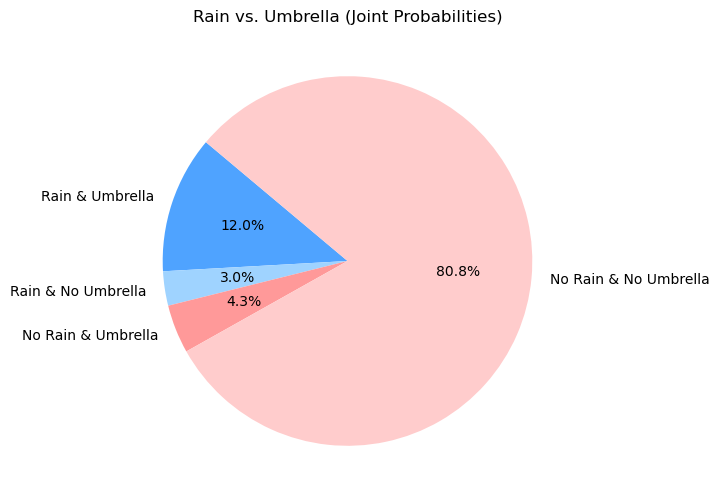

In [37]:
# Provide the probability of rain P(R)
P_R = 0.15

# Provide the probability of a person carrying an umbrella when it's raining
P_U_given_R = 0.8

# Provide the probability of a person carrying an umbrella when it's not raining
P_U_given_notR = 0.05

bayes_with_pie(P_R, P_U_given_R, P_U_given_notR)

## Monty Hall Simulations

Trials: 200000
Stay wins:   66838 (0.3342)
Switch wins: 133162 (0.6658)


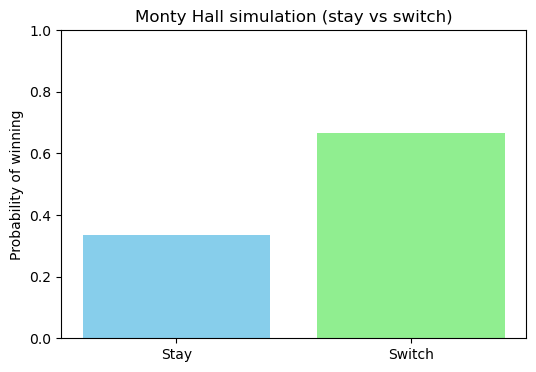

In [38]:
import random
import matplotlib.pyplot as plt

def monty_hall_sim(n_trials=200000):
    """Simulate Monty Hall for n_trials and return (stay_wins, switch_wins)."""
    stay_wins = 0
    switch_wins = 0
    
    for _ in range(n_trials):
        # Randomly place the car behind one of 3 doors
        car = random.randrange(3)        # 0,1,2
        # Player randomly picks a door
        choice = random.randrange(3)
        
        # Host opens a door that is not the player's choice and not the car
        possible_hosts = [d for d in range(3) if d != choice and d != car]
        host = random.choice(possible_hosts)
        
        # The door available for switching
        switch_target = [d for d in range(3) if d != choice and d != host][0]
        
        # Check outcomes
        if choice == car:        # staying wins
            stay_wins += 1
        if switch_target == car: # switching wins
            switch_wins += 1
            
    return stay_wins, switch_wins

# Run simulation
N = 200000
stay_wins, switch_wins = monty_hall_sim(N)
stay_prob = stay_wins / N
switch_prob = switch_wins / N

# Print results
print(f"Trials: {N}")
print(f"Stay wins:   {stay_wins} ({stay_prob:.4f})")
print(f"Switch wins: {switch_wins} ({switch_prob:.4f})")

# Plot results
plt.figure(figsize=(6,4))
plt.bar(['Stay','Switch'], [stay_prob, switch_prob], color=['skyblue','lightgreen'])
plt.ylim(0,1)
plt.ylabel('Probability of winning')
plt.title('Monty Hall simulation (stay vs switch)')
plt.show()


## Monte Carlo Integration

Credit to Jimmy Padilla

Monte Carlo integration is about estimating the area under a curve by using random points instead of exact math. If we pick random points on the graph of a function, we can expect that a certain fraction of those points will land in the region we want vs outside of it. As our number of samples gets large, we can expect this ratio to approach the true ratio.

$\text{Area under curve} = \frac{\text{points inside region}}{\text{total points}} * \text{area of the total region}$

Try changing the bounds, function, or number of samples in this example. Also try running it a couple times to the values change.

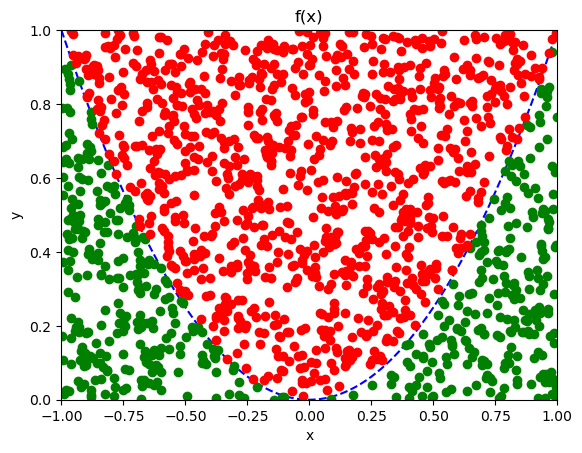

Total Points = 1500
Green Points = 508
Red Points = 992
Green/Total = 0.33867
Approx. Area = 0.67733
Real Area = 0.66667
% error = 1.57480%


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

a, b = -1.0, 1.0 # try changing the bounds
f = lambda x: np.abs(x**2) # try changing the function (this only works if the function is positive)
x = np.linspace(a, b, 500)
ymax = np.max(f(x))

# this really only works for positive areas (will get weird for other shapes the way I'm writing it.)
plt.xlim(a, b)
plt.ylim(0, ymax)
plt.plot(x, f(x), 'b--', label="y=f(x)")

# now we generate our huge number of points
scatter_points = []
N = 1500
for i in range(N):
    x_sample = np.random.random() * (b-a) + a # generates a random value between [-1, 1)
    y_sample = np.random.random() * (ymax) # generates a random value between [0, ymax)
    scatter_points.append((x_sample, y_sample))

points_in = []
points_out = []
for sample_point in scatter_points:
    if (sample_point[1] > f(sample_point[0])): # checking whether the point is above or below f(x)
        points_out.append(sample_point)
    else:
        points_in.append(sample_point)
    
x_in, y_in = zip(*points_in)
x_out, y_out = zip(*points_out)

plt.plot(x_in, y_in, 'go', label="in")
plt.plot(x_out, y_out, 'ro', label="out")
plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

ratio = len(points_in) / N
approx_area = ratio * ymax * (b - a) # ymax * (b-a) is the area of the rectangle in the graph

result, _ = quad(f, a, b) # this is how you do an integral in python (using riemann sum)
p_error = (np.abs(result - approx_area))/approx_area # % error = (actual - expected) / expected

print(f"Total Points = {N}")
print(f"Green Points = {len(points_in)}")
print(f"Red Points = {len(points_out)}")
print(f"Green/Total = {ratio:.5f}")
print(f"Approx. Area = {approx_area:.5f}")
print(f"Real Area = {result:.5f}")
print(f"% error = {p_error*100:.5f}%")